
# Project: Investigate a Dataset (Soccer Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. It consists of seven tables that have data about 11 different leagues in 11 different countries in the time period that was just mentioned.
>
> **You can download the database from <a href = https://www.kaggle.com/hugomathien/soccer> here</a>.**
>
> After examining the database and searching for recommended questions on kaggle, I have reached the following questions:
>
> <ol>
    <li>What home/away teams had most wins in all leagues?</li>
    <li>Which team won on season 2015/2016 in German league?</li>
    <li>Which players had the highest 10 ratings?</li>
    <li>Which league is more competitive?</li>
    <li>What attributes contribute in the team winning?</li>

In [9]:
# import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sqla

% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

### General Properties

> In this section I connect to the SQLite database and get the tables I need then convert them to pandas dataframes. After that, I start exploring my data to decide on what cleaning decisions I am going to execute.

In [10]:
# use SQLAlchemy to connect to the SQLite database
soccer = sqla.create_engine('sqlite:///database.sqlite')

# convert every table in the database to a dataframe
df_team = pd.read_sql('select * from Team', soccer)
df_player = pd.read_sql('select * from Player', soccer)
df_league = pd.read_sql('select * from League', soccer)
df_country = pd.read_sql('select * from Country', soccer)
df_team_att = pd.read_sql('select * from Team_Attributes', soccer)
df_player_att = pd.read_sql('select * from Player_Attributes', soccer)
df_match = pd.read_sql('select * from Match', soccer)

In [11]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [12]:
df_team.shape

(299, 5)

> It sows in the above cell that there are 299 teams in our team dataframe. Let's find out if there are any duplicates.

In [13]:
# number of unique teams
len(df_team.team_long_name.unique())

296

> We find that there are 296 unique teams, which means there are 3 duplicates. This will be handled in the cleaning process.

In [14]:
# number of duplicated teams
df_team.team_long_name.duplicated().sum()

3

In [15]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [16]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [17]:
df_player.shape

(11060, 7)

In [18]:
# number of unique player names
len(df_player.player_name.unique())

10848

> Here we find that unique player names are less than the number of rows in the dataframe, which means some players pocess the same name. In the next 2 cells we confirm this assumption, as the number of unique ids is the same as the number of rows and we find that there are some players have the same name.

In [19]:
# number of unique player ids
len(df_player.player_api_id.unique())

11060

In [20]:
# number of duplicated player names
df_player.player_name.duplicated().sum()

212

In [21]:
# number of duplicated player ids
df_player.player_api_id.duplicated().sum()

0

In [22]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [23]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [24]:
df_league.shape

(11, 3)

In [25]:
# number of unique leagues
len(df_league.name.unique())

11

> We have 11 leagues to be investigated in our dataset.

In [26]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [27]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [28]:
df_country.shape

(11, 2)

In [29]:
# number of unique countries
len(df_country.name.unique())

11

> We have 11 countries to be investigated in our dataset. Corresponding to the 11 countries, of course.

In [30]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [31]:
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


> You can see that there is no team name in here, that's why it has to be merged with the team table based on the team id.

In [32]:
df_team_att.shape

(1458, 25)

In [33]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

> All data here seem good except for the buildUpPlayDribbling column. It has a lot of missing data, but we can fix that using the dribbling class to set up a range for it and then fill those missing data.

In [34]:
df_player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


> You can see that there is no player name in here, that's why it has to be merged with the player table based on the player id.

In [35]:
df_player_att.shape

(183978, 42)

In [36]:
df_player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

> Here we have some missing data, too. But it has a small impact on our dataset as it's not that big, so we can drop them later.

In [37]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [38]:
df_match.shape

(25979, 115)

In [39]:
# number of unique matches
len(df_match.match_api_id.unique())

25979

> Our dataset contains data about 25979 matches and some columns have null values, but they could be of no use for our analysis.

In [40]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [41]:
# number of missing values
df_match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

### Data Cleaning

#### Match Table

> In this section we will drop the unneeded columns and merge league and team tables with the match table.

In [42]:
# drop the columns that aren't needed in the analysis
df_match.dropna(axis='columns', inplace=True)
df_match.drop(['stage', 'match_api_id'], axis=1, inplace=True)
df_match.head()

,id,country_id,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,7947,9985,1,3


In [43]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   date              25979 non-null  object
 5   home_team_api_id  25979 non-null  int64 
 6   away_team_api_id  25979 non-null  int64 
 7   home_team_goal    25979 non-null  int64 
 8   away_team_goal    25979 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.8+ MB


In [44]:
# convert the date column to datetime
df_match['date'] = pd.to_datetime(df_match['date'])

In [45]:
# copy country dataframe
df_country_copy = df_country.copy()

# rename name to country_name and id to country_id
df_country_copy.rename(columns={'name' : 'country_name', 'id': 'country_id'}, inplace=True)

# apply inner merge with country table
df_match = df_match.merge(df_country_copy, how='inner', left_on='country_id', right_on='country_id')

# Now we don't need the id so we drop it
df_match.drop(columns=['country_id'], inplace=True)

> In the previous cell, we applied inner merge between the match table and the country one to know the countries names in the matches, then drop the country id as we don't need it anymore.
>
> We apply the same thing for league and team tables in the next two cells.

In [46]:
# copy league dataframe
df_league_copy = df_league.copy()

# rename name to league_name and id to league_id
df_league_copy.rename(columns={'name': 'league_name', 'id': 'league_id'}, inplace=True)

# apply inner merge with league table
df_match = df_match.merge(df_league_copy, how='inner', left_on='league_id', right_on='league_id')

# now we don't need country_id and league_id so we drop them
df_match.drop(columns=['league_id', 'country_id'], inplace=True)

In [47]:
# copy team dataframe
df_team_copy = df_team.copy()

# we just need team_api_id and team_long_name so we drop the rest
df_team_copy.drop(columns=[ 'team_fifa_api_id', 'team_short_name', 'id'], axis=1, inplace=True)

In [48]:
# merge for the home_team_id
df_match = df_match.merge(df_team_copy, how='inner', left_on='home_team_api_id', right_on='team_api_id')

df_match.rename(columns={'team_long_name': 'home_team_name'}, inplace=True)

df_match.drop(columns=['home_team_api_id', 'team_api_id'], axis=1, inplace=True)

# merge for the away_team_id
df_match = df_match.merge(df_team_copy, how='left', left_on='away_team_api_id', right_on='team_api_id')

df_match.rename(columns={'team_long_name': 'away_team_name'}, inplace=True)

df_match.drop(columns=['team_api_id', 'away_team_api_id'], axis=1, inplace=True)

> We need to know the result of the matches if someone wins or there is a draw, so that's what is applied using result function.

In [49]:
# getting the result of the match
def result(entry):
    home_score = entry[0]
    home_team_name = entry[1]
    away_score = entry[2]
    away_team_name = entry[3]
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'Draw'

# add a result column
df_match['result']  = df_match[['home_team_goal', 'home_team_name', 'away_team_goal', 'away_team_name']].apply(result, axis=1)

# final look of the match table
df_match.head()

,id,season,date,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name,result
0,1,2008/2009,2008-08-17,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Draw
1,29,2008/2009,2008-11-15,1,1,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Draw
2,47,2008/2009,2008-11-29,3,2,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008/2009,2008-12-13,1,0,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2008/2009,2009-01-24,2,0,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


In [50]:
# now we save the cleaned data
df_match.to_csv('match_clean.csv', index=False)

#### Team Table
>
> In this section we will repeat what was done previously. Dropping duplicates and unwanted columns and merging.

In [51]:
# as we noticed before there are some duplicates based on the team name so we drop them
df_team.drop_duplicates(subset=['team_long_name'], inplace=True)

# now let's see the shape
df_team.shape

(296, 5)

In [52]:
# join teams with their attributes tables
df_team_merged = df_team_att.merge(df_team, left_on='team_api_id', right_on='team_api_id')

# drop columns that we don't need
df_team_merged.drop(columns=['team_fifa_api_id_x', 'id_y', 'team_fifa_api_id_y'], inplace=True)

# rename columns to remove suffix, _x for the left table, _y for the right table
df_team_merged.rename(columns={'id_x': 'id', 'team_fifa_api_id_x': 'team_fifa_api_id'}, inplace=True)

# convert date column type to datetime
df_team_merged['date'] = pd.to_datetime(df_team_merged['date'])

df_team_merged.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,Organised,...,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22,70,Fast,NaN,Little,70,Long,Organised,...,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,Organised,...,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE


In [53]:
# now we save the cleaned data
df_team_merged.to_csv('team_clean.csv', index=False)

#### Player Table
>
> In this section we will repeat what was done previously. Dropping duplicates, nulls and unwanted columns and merging.

In [54]:
# dropping null values
df_player_att.dropna()

# join the player tables
df_player_att = df_player_att.merge(df_player, left_on='player_api_id', right_on='player_api_id')

# rename id_x to id
df_player_att.rename(columns={'id_x': 'id'}, inplace=True)

# drop unwanted columns
df_player_att.drop(columns=['id_y', 'player_fifa_api_id_y', 'player_fifa_api_id_x'], inplace=True)

# convert birthday and date columns to datetime
df_player_att['birthday'] = pd.to_datetime(df_player_att['birthday'])
df_player_att['date'] = pd.to_datetime(df_player_att['date'])

df_player_att.head()

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
1,2,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
2,3,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
3,4,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187
4,5,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187


In [55]:
# now we save the cleaned data
df_player_att.to_csv('player_clean.csv', index=False)

> Now our dataset is cleaned and we can move on to the next step.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What home/away teams had most wins in all leagues?)
>
> First, we read our cleaned csv files, then see out cleaned data.

In [56]:
df_match = pd.read_csv('match_clean.csv')
df_team = pd.read_csv('team_clean.csv')
df_player = pd.read_csv('player_clean.csv')

In [57]:
df_match.head()

,id,season,date,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name,result
0,1,2008/2009,2008-08-17,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Draw
1,29,2008/2009,2008-11-15,1,1,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Draw
2,47,2008/2009,2008-11-29,3,2,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008/2009,2008-12-13,1,0,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2008/2009,2009-01-24,2,0,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


> Next, we query the home teams that had the most wins in all leagues over the time period.

In [58]:
# query the home_teams that won the matches and sorting them descendingly
df_match.query('home_team_name == result').groupby(['result']).count()['id'].sort_values(ascending=False)

result
FC Barcelona             131
Real Madrid CF           129
Celtic                   120
Manchester United        116
Manchester City          113
                        ... 
SV Darmstadt 98            2
AC Arles-Avignon           2
DSC Arminia Bielefeld      2
Córdoba CF                 1
Dunfermline Athletic       1
Name: id, Length: 295, dtype: int64

> The results show us that FC Barcelona was the first of them all, then comes Real Madrid CF.

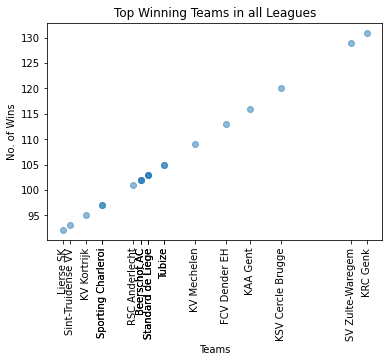

<Figure size 1080x1080 with 0 Axes>

In [59]:
# here is a scatter plot of some of the teams
match_vis = df_match.query('home_team_name == result').groupby(['result']).count()['id'].sort_values(ascending=False)[:20]
match_vis_names = df_match.query('home_team_name == result').result.unique()[:20]
plt.scatter(match_vis, match_vis, alpha=0.5);
plt.xticks(ticks=match_vis, labels=match_vis_names, rotation=90);
plt.title('Top Winning Teams in all Leagues');
plt.xlabel('Teams');
plt.ylabel('No. of Wins');
plt.figure(figsize=(15,15));
plt.tight_layout();

In [60]:
# query the away_teams that won the matches and sorting them descendingly
df_match.query('away_team_name == result').groupby(['result']).count()['id'].sort_values(ascending=False)

result
FC Barcelona              103
Real Madrid CF             99
Celtic                     98
Juventus                   84
FC Bayern Munich           84
                         ... 
Brescia                     1
Eintracht Braunschweig      1
Uniao da Madeira            1
FC Dordrecht                1
FC Volendam                 1
Name: id, Length: 296, dtype: int64

> Doing the same thing over again for the away teams we find that first two teams didn't differ, which implies that the spanish league this season was dominated by those two teams and it's not a strong league.

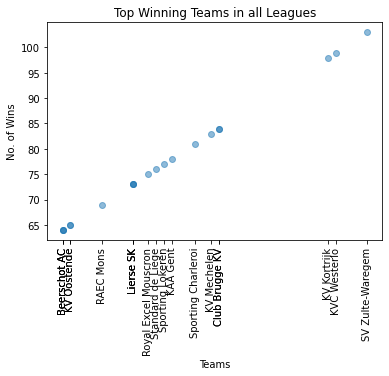

<Figure size 1080x1080 with 0 Axes>

In [61]:
# here is a scatter plot of some of the teams
match_vis = df_match.query('away_team_name == result').groupby(['result']).count()['id'].sort_values(ascending=False)[:20]
match_vis_names = df_match.query('away_team_name == result').result.unique()[:20]
plt.scatter(match_vis, match_vis, alpha=0.5);
plt.xticks(ticks=match_vis, labels=match_vis_names, rotation=90);
plt.title('Top Winning Teams in all Leagues');
plt.xlabel('Teams');
plt.ylabel('No. of Wins');
plt.figure(figsize=(15,15));
plt.tight_layout();

### Research Question 2  (Which team won on season 2015/2016 in German league?)
>
> First, we query the wanted season and league which are 2015/2016 and german league.

In [62]:
# query the 2015/2016 season and Germany as the country to get our wanted league
matches = df_match.query('season == "2015/2016" and country_name == "Germany"')[['league_name', 'home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name', 'result']]
matches.head()

,league_name,home_team_goal,away_team_goal,home_team_name,away_team_name,result
7927,Germany 1. Bundesliga,5,0,FC Bayern Munich,Hamburger SV,FC Bayern Munich
7928,Germany 1. Bundesliga,4,0,FC Bayern Munich,1. FC Köln,FC Bayern Munich
7929,Germany 1. Bundesliga,4,0,FC Bayern Munich,VfB Stuttgart,FC Bayern Munich
7930,Germany 1. Bundesliga,2,0,FC Bayern Munich,Hertha BSC Berlin,FC Bayern Munich
7931,Germany 1. Bundesliga,2,0,FC Bayern Munich,FC Ingolstadt 04,FC Bayern Munich


In [63]:
# count the values of the results of matches
league_winner = matches['result'].value_counts()
league_winner.head()

Draw                        71
FC Bayern Munich            28
Borussia Dortmund           24
Bayer 04 Leverkusen         18
Borussia Mönchengladbach    17
Name: result, dtype: int64

> It shows that FC Bayern Munich won the league that season, and it shows also that alot of draws happen which means this season was very competitive.

### Research Question 3  (Which players had the highest 10 ratings?)
>
> In this question we will get the best 10 players in Europe by sorting them using their rating.

In [64]:
df_player.head()

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
1,2,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
2,3,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
3,4,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187
4,5,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187


In [65]:
# getting the highest 10 ratings and display the players names sorted
df_player.groupby(['player_name'])['overall_rating'].max().sort_values(ascending=False)[:10]

player_name
Lionel Messi         94.0
Cristiano Ronaldo    93.0
Gianluigi Buffon     93.0
Wayne Rooney         93.0
Xavi Hernandez       92.0
Gregory Coupet       92.0
Iker Casillas        91.0
John Terry           91.0
Thierry Henry        91.0
Andres Iniesta       91.0
Name: overall_rating, dtype: float64

### Research Question 4  (Which league is more competitive?)
>
> We find that by the number of draws that take place in that league. The more draws happen, the more this league tend to be competitive.

In [66]:
# getting number of draws in all leagues over the time period
df_match.query('result == "Draw"')[['league_name', 'result']].value_counts().sort_values(ascending=False)

league_name               result
France Ligue 1            Draw      859
Italy Serie A             Draw      796
England Premier League    Draw      783
Spain LIGA BBVA           Draw      704
Germany 1. Bundesliga     Draw      597
Netherlands Eredivisie    Draw      581
Portugal Liga ZON Sagres  Draw      533
Poland Ekstraklasa        Draw      525
Scotland Premier League   Draw      447
Belgium Jupiler League    Draw      425
Switzerland Super League  Draw      346
dtype: int64

### Research Question 5  (What attributes contribute in the team winning?)

In [67]:
df_match['date'] = pd.to_datetime(df_match['date'])
df_match['year'] = df_match['date'].dt.year
df_team['date'] = pd.to_datetime(df_team['date'])
df_team['year'] = df_team['date'].dt.year
matches = df_match.query('season == "2011/2012"')
winners = matches.groupby('result')['id'].count().sort_values(ascending=False)

> We first get the most 10 winning teams

In [68]:
winners[1:11]

result
Real Madrid CF            32
Celtic                    30
Manchester City           28
Manchester United         28
FC Barcelona              28
Rangers                   26
Montpellier Hérault SC    25
Borussia Dortmund         25
Milan                     23
Ajax                      23
Name: id, dtype: int64

In [69]:
columns = ['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing','chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting','defencePressure', 'defenceAggression', 'defenceTeamWidth']

In [70]:
# naming of the ten winners
ten_winners = winners[1:11].index
print(ten_winners)

Index(['Real Madrid CF', 'Celtic', 'Manchester City', 'Manchester United',
       'FC Barcelona', 'Rangers', 'Montpellier Hérault SC',
       'Borussia Dortmund', 'Milan', 'Ajax'],
      dtype='object', name='result')


In [71]:
# query only the expected years and team_long_name must exist in the list
winners_stats = df_team.query('team_long_name in @ten_winners and (year == 2011 or year == 2012)')[columns]

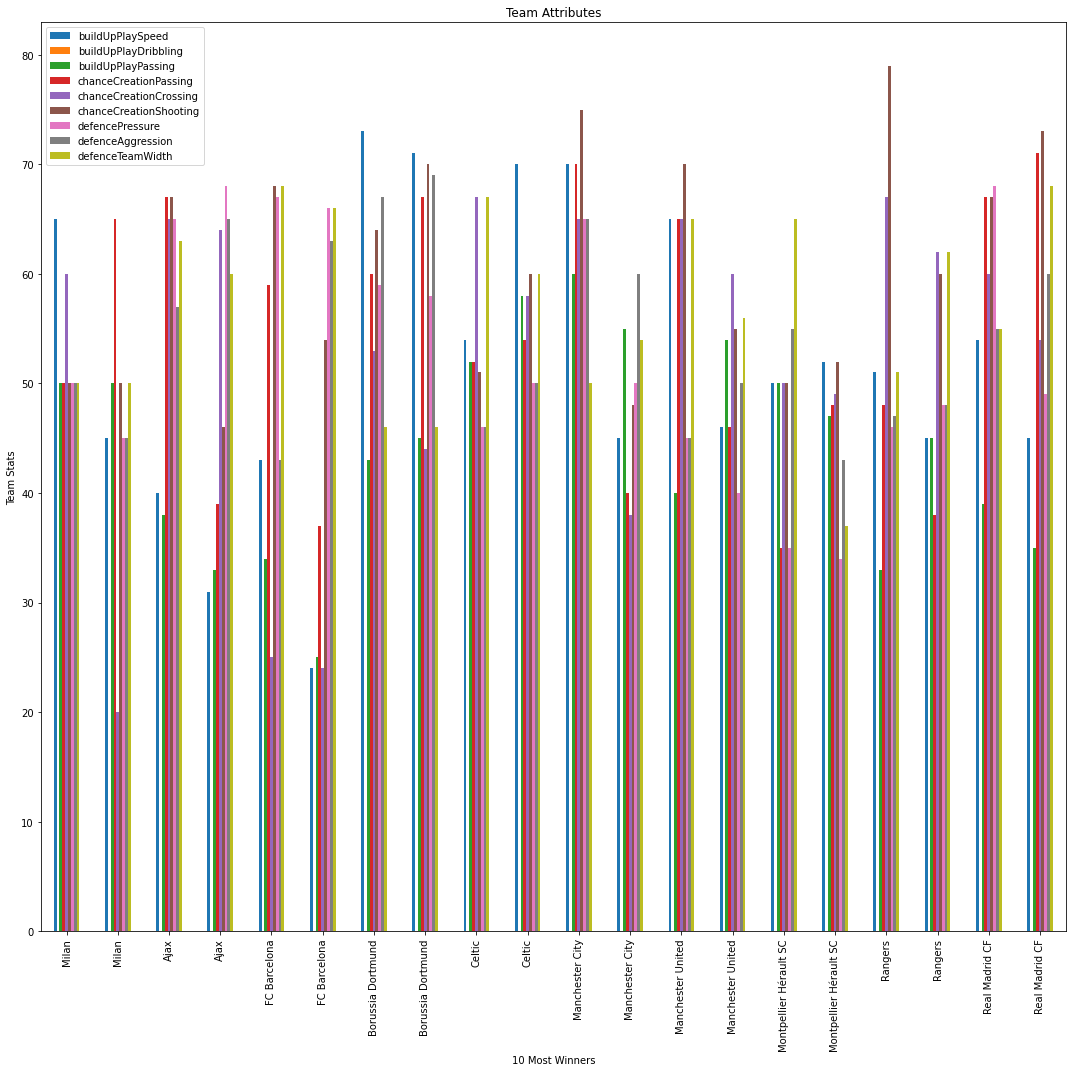

In [72]:
fig, ax = plt.subplots(figsize=(15, 15))

# create a new bar char
ax = winners_stats.plot.bar(ax=ax);

ax.set_xticklabels(winners_stats['team_long_name'], rotation=90)

# Set the y axis label
ax.set_ylabel('Team Stats')

# Set the chart's title
ax.set_title('Team Attributes')

# Set the y axis label 
plt.xlabel("10 Most Winners")

plt.tight_layout();

<a id='conclusions'></a>
## Conclusions
>
> In this section, I will talk about my findings:
> 
>    1. What home/away teams had most wins in all leagues?
    The most winning two teams in all leagues over our study period of time was FC Barcelona and Real Madrid CF, respectively.
    
>    2. Which team won on season 2015/2016 in German league?
     FC Bayern Munich won the german league on that season due to winning more games and gaining more points.
    
>    3. Which players had the highest 10 ratings?
     It was found the following:
     Lionel Messi         
     Cristiano Ronaldo    
     Gianluigi Buffon    
     Wayne Rooney        
     Xavi Hernandez       
     Gregory Coupet      
     Iker Casillas        
     John Terry           
     Thierry Henry        
     Andres Iniesta
    
>    4. Which league is more competitive?
    I answered this question based on the assumption that competitiveness means more draws so after finding number of draws in all leagues, our most competitive league is:
    France Ligue 1
    
>    5. What attributes contribute in the team winning?
    I have selected the season 2011/2012 and picked some of the most winning teams in that season to examine the attributes that contribute to winning and the most attributes are:
    defenceTeamWidth
    defencePressure
    chanceCreationShooting
    chanceCreationPassing
>
### Limitations
>
> I have run into some limitations like there were missing values in the buildUpPlayDribbling but I thought treating them as zeroes would be easier. The merging process of the different tables was a little bit hard and delivering the results in good visuals, too.